In [1]:
# Dependencies and Set up
import requests
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Reading the csv file
data = pd.read_csv('Resources/crypto_data.csv')
data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
data.shape

(1252, 7)

In [4]:
# Discard all cryptocurrencies that are not being traded
data = data.loc[data['IsTrading']== True]
data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
data.shape

(1144, 7)

In [6]:
# Drop the IsTrading column from the dataframe
data = data.drop(columns = 'IsTrading')

In [7]:
data.shape

(1144, 6)

In [8]:
# Remove all rows that have at least one null value
data.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [9]:
# Dropping nulls
data = data.dropna()
data

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
data.shape

(685, 6)

In [11]:
# Filter for cryptocurrencies that have been mined.
data = data.loc[data['TotalCoinsMined'] > 0]
data

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Create labels for t-SNE
labels = data['CoinName']
labels

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [13]:
# Dropping column CoinName
data.drop(columns ='CoinName', inplace = True)
data

C:\Users\uldom\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [14]:
# Setting up index
data = data.set_index('Unnamed: 0')

In [15]:
data.shape

(532, 4)

In [16]:
data

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [17]:
# Convert columns to numerical values

X = pd.get_dummies(data, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [19]:
# Standarize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [20]:
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Applying PCA to reduce dimensions from 98 to 3

# Initialize PCA model
# pca3 = PCA(n_components=3)
pca = PCA(n_components=0.90)

# # Get two principal components for the dataset
data_pca = pca.fit_transform(scaled_data)

In [22]:
# Transform PCA data to a DataFrame
df_data_pca = pd.DataFrame(data=data_pca)
df_data_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-2.776066e-14,-2.964611e-12,-8.034166e-15,-0.007129,-1.319756,-0.051813,...,-1.393458e-15,-4.632208e-15,2.901479e-15,-3.927559e-16,2.359369e-15,1.915809e-15,-1.271061e-15,2.446164e-15,-2.012667e-15,3.584736e-15
1,-0.318434,1.032331,-0.591126,0.001386,-2.777421e-14,-2.940594e-12,-7.659317e-15,-0.007739,-1.322514,-0.056674,...,-1.213636e-15,-5.617160e-15,2.575597e-15,-5.468723e-16,2.543230e-15,1.677293e-15,-1.640201e-15,1.503215e-15,-2.868878e-15,2.531458e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.954050e-14,-1.001501e-11,-2.019841e-15,-0.054781,-1.542879,-0.943951,...,3.971534e-14,7.263187e-14,-4.511906e-14,-2.671306e-14,-3.552249e-14,-7.581963e-15,2.937950e-14,1.011065e-14,-1.618718e-15,-2.163574e-14
3,-0.145184,-1.320593,0.192813,-0.001229,1.172441e-14,2.599536e-12,1.020396e-15,-0.002071,0.281463,0.251862,...,2.058124e-15,1.926354e-14,-6.249432e-15,1.611142e-15,-8.171434e-16,-5.905466e-15,6.395674e-15,-2.698072e-15,5.854962e-15,1.066747e-14
4,-0.151768,-2.036192,0.396182,-0.001705,2.692936e-14,3.604499e-12,5.690918e-17,0.027735,0.519099,0.188820,...,9.554284e-14,-3.295857e-14,-2.060245e-14,6.108279e-14,4.836339e-14,-2.003868e-14,-8.245707e-14,-7.647453e-14,-1.705355e-14,9.384198e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-5.444570e-14,1.734971e-11,3.308107e-14,-0.851713,2.041159,3.560713,...,7.557761e-15,1.883769e-14,-8.054817e-15,3.469387e-15,-7.975775e-17,-6.043760e-15,7.053703e-15,-1.828589e-15,2.867925e-15,1.205353e-14
528,-0.333144,1.032071,-0.590740,0.001399,-2.772441e-14,-2.969507e-12,-7.929351e-15,-0.007154,-1.320125,-0.052460,...,-1.591959e-15,-4.763360e-15,2.763400e-15,-1.752156e-16,2.197704e-15,1.476817e-15,-1.593836e-15,2.087568e-15,-2.257778e-15,3.394176e-15
529,0.324349,-2.312308,0.421515,-0.001319,2.187430e-14,2.795577e-12,2.151368e-15,0.017309,0.161077,-0.047787,...,1.926871e-14,1.547654e-14,-7.178832e-15,-3.231476e-15,2.135252e-14,-5.549327e-15,6.320276e-16,-2.656268e-14,-1.055236e-14,9.502628e-15
530,-0.149364,-2.049336,0.412968,-0.001745,2.466949e-14,3.695531e-12,3.122182e-15,0.028954,0.544389,0.233373,...,2.803449e-15,1.219000e-15,4.004927e-17,4.730820e-16,2.002464e-16,3.704558e-16,6.658191e-16,-2.002464e-16,2.122611e-15,2.422981e-15


In [23]:
# Fetch the explained variance
pca.explained_variance_

array([2.74246154, 2.1029187 , 2.01436892, 2.00754156, 2.00754005,
       2.00754005, 2.00754005, 2.00547232, 1.8369474 , 1.72440686,
       1.70949674, 1.59943293, 1.56717658, 1.52297788, 1.40895337,
       1.29713801, 1.21413359, 1.18435602, 1.08424717, 1.05204614,
       1.03003376, 1.02198993, 1.02022505, 1.01890094, 1.01661666,
       1.01526166, 1.01091357, 1.0095665 , 1.00947326, 1.00947326,
       1.00947323, 1.00930286, 1.00840538, 1.00769894, 1.00757175,
       1.00713878, 1.00694666, 1.0064583 , 1.00631669, 1.00568376,
       1.00566393, 1.00566393, 1.00559617, 1.00542785, 1.00509215,
       1.00491444, 1.00442832, 1.00388029, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002])

In [33]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [34]:
# Create labels for t-SNE
labels

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [42]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [43]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_data_pca)

In [44]:
tsne_features.shape

(532, 2)

In [45]:
# Prepare to plot the dataset

# The first column of transformed features
df_data_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_data_pca['y'] = tsne_features[:,1]

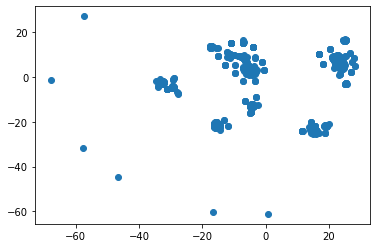

In [46]:
# Visualize the clusters
plt.scatter(df_data_pca['x'], df_data_pca['y'])
plt.show()

In [47]:
labels.value_counts()

DubaiCoin        2
Azart            1
Let it Ride      1
DaxxCoin         1
NamoCoin         1
                ..
Bitspace         1
RubyCoin         1
Xios             1
AquariusCoin     1
Revolution VR    1
Name: CoinName, Length: 531, dtype: int64

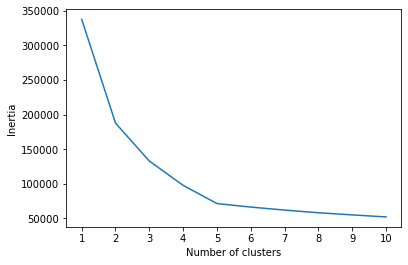

In [48]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]
# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_data_pca)
    km.predict
    inertia.append(km.inertia_)
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [49]:
df_elbow

,k,inertia
0,1,337585.637382
1,2,187659.796098
2,3,132808.737443
3,4,97710.459951
4,5,71379.216945
5,6,66309.076816
6,7,61945.537267
7,8,58098.689920
8,9,54993.582376
9,10,52089.459174


In [50]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_data_pca)

# Predict clusters
predictions = model.predict(df_data_pca)

# Add the predicted class columns
df_data_pca["class"] = model.labels_
df_data_pca

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335099,1.032189,-0.590713,0.001397,-2.776066e-14,-2.964611e-12,-8.034166e-15,-0.007129,-1.319756,-0.051813,...,-3.927559e-16,2.359369e-15,1.915809e-15,-1.271061e-15,2.446164e-15,-2.012667e-15,3.584736e-15,23.453390,3.687373,2
1,-0.318434,1.032331,-0.591126,0.001386,-2.777421e-14,-2.940594e-12,-7.659317e-15,-0.007739,-1.322514,-0.056674,...,-5.468723e-16,2.543230e-15,1.677293e-15,-1.640201e-15,1.503215e-15,-2.868878e-15,2.531458e-15,21.236700,8.098268,2
2,2.305468,1.656383,-0.683617,0.004731,-4.954050e-14,-1.001501e-11,-2.019841e-15,-0.054781,-1.542879,-0.943951,...,-2.671306e-14,-3.552249e-14,-7.581963e-15,2.937950e-14,1.011065e-14,-1.618718e-15,-2.163574e-14,24.396963,16.599880,2
3,-0.145184,-1.320593,0.192813,-0.001229,1.172441e-14,2.599536e-12,1.020396e-15,-0.002071,0.281463,0.251862,...,1.611142e-15,-8.171434e-16,-5.905466e-15,6.395674e-15,-2.698072e-15,5.854962e-15,1.066747e-14,-32.364742,-1.996350,1
4,-0.151768,-2.036192,0.396182,-0.001705,2.692936e-14,3.604499e-12,5.690918e-17,0.027735,0.519099,0.188820,...,6.108279e-14,4.836339e-14,-2.003868e-14,-8.245707e-14,-7.647453e-14,-1.705355e-14,9.384198e-14,-11.026904,15.195551,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-5.444570e-14,1.734971e-11,3.308107e-14,-0.851713,2.041159,3.560713,...,3.469387e-15,-7.975775e-17,-6.043760e-15,7.053703e-15,-1.828589e-15,2.867925e-15,1.205353e-14,-33.985615,-4.119359,1
528,-0.333144,1.032071,-0.590740,0.001399,-2.772441e-14,-2.969507e-12,-7.929351e-15,-0.007154,-1.320125,-0.052460,...,-1.752156e-16,2.197704e-15,1.476817e-15,-1.593836e-15,2.087568e-15,-2.257778e-15,3.394176e-15,22.378075,9.192854,2
529,0.324349,-2.312308,0.421515,-0.001319,2.187430e-14,2.795577e-12,2.151368e-15,0.017309,0.161077,-0.047787,...,-3.231476e-15,2.135252e-14,-5.549327e-15,6.320276e-16,-2.656268e-14,-1.055236e-14,9.502628e-15,-17.260216,12.992673,1
530,-0.149364,-2.049336,0.412968,-0.001745,2.466949e-14,3.695531e-12,3.122182e-15,0.028954,0.544389,0.233373,...,4.730820e-16,2.002464e-16,3.704558e-16,6.658191e-16,-2.002464e-16,2.122611e-15,2.422981e-15,-7.234165,15.376328,1


In [54]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)
    # Train the model
    model.fit(data)
    # Predict clusters
    predictions = model.predict(data)
    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_
    return data

In [55]:
clusters = get_clusters(4, df_data_pca)
clusters

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335099,1.032189,-0.590713,0.001397,-2.776066e-14,-2.964611e-12,-8.034166e-15,-0.007129,-1.319756,-0.051813,...,-3.927559e-16,2.359369e-15,1.915809e-15,-1.271061e-15,2.446164e-15,-2.012667e-15,3.584736e-15,23.453390,3.687373,1
1,-0.318434,1.032331,-0.591126,0.001386,-2.777421e-14,-2.940594e-12,-7.659317e-15,-0.007739,-1.322514,-0.056674,...,-5.468723e-16,2.543230e-15,1.677293e-15,-1.640201e-15,1.503215e-15,-2.868878e-15,2.531458e-15,21.236700,8.098268,1
2,2.305468,1.656383,-0.683617,0.004731,-4.954050e-14,-1.001501e-11,-2.019841e-15,-0.054781,-1.542879,-0.943951,...,-2.671306e-14,-3.552249e-14,-7.581963e-15,2.937950e-14,1.011065e-14,-1.618718e-15,-2.163574e-14,24.396963,16.599880,1
3,-0.145184,-1.320593,0.192813,-0.001229,1.172441e-14,2.599536e-12,1.020396e-15,-0.002071,0.281463,0.251862,...,1.611142e-15,-8.171434e-16,-5.905466e-15,6.395674e-15,-2.698072e-15,5.854962e-15,1.066747e-14,-32.364742,-1.996350,3
4,-0.151768,-2.036192,0.396182,-0.001705,2.692936e-14,3.604499e-12,5.690918e-17,0.027735,0.519099,0.188820,...,6.108279e-14,4.836339e-14,-2.003868e-14,-8.245707e-14,-7.647453e-14,-1.705355e-14,9.384198e-14,-11.026904,15.195551,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-5.444570e-14,1.734971e-11,3.308107e-14,-0.851713,2.041159,3.560713,...,3.469387e-15,-7.975775e-17,-6.043760e-15,7.053703e-15,-1.828589e-15,2.867925e-15,1.205353e-14,-33.985615,-4.119359,3
528,-0.333144,1.032071,-0.590740,0.001399,-2.772441e-14,-2.969507e-12,-7.929351e-15,-0.007154,-1.320125,-0.052460,...,-1.752156e-16,2.197704e-15,1.476817e-15,-1.593836e-15,2.087568e-15,-2.257778e-15,3.394176e-15,22.378075,9.192854,1
529,0.324349,-2.312308,0.421515,-0.001319,2.187430e-14,2.795577e-12,2.151368e-15,0.017309,0.161077,-0.047787,...,-3.231476e-15,2.135252e-14,-5.549327e-15,6.320276e-16,-2.656268e-14,-1.055236e-14,9.502628e-15,-17.260216,12.992673,0
530,-0.149364,-2.049336,0.412968,-0.001745,2.466949e-14,3.695531e-12,3.122182e-15,0.028954,0.544389,0.233373,...,4.730820e-16,2.002464e-16,3.704558e-16,6.658191e-16,-2.002464e-16,2.122611e-15,2.422981e-15,-7.234165,15.376328,0


In [57]:
def show_clusters(df):
    plt.scatter(df[0], df[1], c=df['class'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

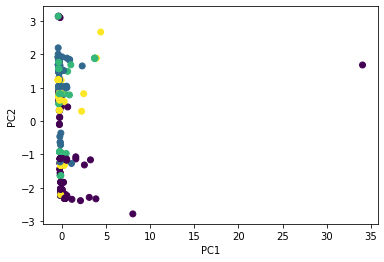

In [58]:
show_clusters(df_data_pca)

In [59]:
import plotly.express as px
fig = px.scatter_3d(
    clusters,
    x=0,
    y=1,
    z=2,
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()